In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot
import cmaps
import salem
import cartopy.crs as ccrs

In [2]:
halo = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/halosteric_sea_level_2000_anomaly_1990_2020.nc')
halo = halo.salinity
halo = halo*1000
halo = halo.groupby('time.year').mean()

data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/thermosteric_sea_level_2000_anomaly_1990_2020.nc')
therm = data.__xarray_dataarray_variable__
therm = therm*1000
therm = therm.groupby('time.year').mean()

data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/steric_sea_level_2000_anomaly_1990_2020.nc')
steric = data.__xarray_dataarray_variable__
steric = steric*1000
steric = steric.groupby('time.year').mean()

In [3]:
Indian_shp = salem.read_shapefile(r'D:/ENSO_salinity/ocean_shp/Indian/iho.shp')
Pacific_shp = salem.read_shapefile(r'D:/ENSO_salinity/ocean_shp/Pacific/Export_Output_5.shp')
Atlantic_shp = salem.read_shapefile(r'D:/ENSO_salinity/ocean_shp/Atlantic/Export_Output.shp')

In [4]:
steric_all = [halo,therm,steric]
Pacific_zonal = [];Indian_zonal=[];Atlantic_zonal=[]
for i in range(0,3):
    Pacific_area = steric_all[i].salem.roi(shape=Pacific_shp)
    Pacific_zonal_mean = Pacific_area.mean(dim='lon')
    Pacific_zonal.append(Pacific_zonal_mean)
    Indian_area = steric_all[i].salem.roi(shape=Indian_shp)
    Indian_zonal_mean = Indian_area.mean(dim='lon')
    Indian_zonal.append(Indian_zonal_mean)
    Atlantic_area = steric_all[i].salem.roi(shape=Atlantic_shp)
    Atlantic_zonal_mean = Atlantic_area.mean(dim='lon')
    Atlantic_zonal.append(Atlantic_zonal_mean)

In [5]:
halo_zonal = halo.mean(dim='lon')
therm_zonal = therm.mean(dim='lon')
steric_zonal = steric.mean(dim='lon')
Global_zonal = [halo_zonal,therm_zonal,steric_zonal]

In [6]:
from scipy import stats
def trend_3d(x,y):
    nlat=y.shape[1]
    trend=np.full([nlat],np.nan)
    p=np.full([nlat],np.nan)
    for i in range(nlat):
        if np.isnan(y[0,i]):
            continue
        else:
            slope,intercept,r,pvalue,stderr=stats.linregress(x,y[:,i])
            trend[i]=slope
            p[i]=pvalue
    lat = y.coords['lat']
    trend=xr.DataArray(trend,coords=[lat],dims=['latitude'])
    p=xr.DataArray(p,coords=[lat],dims=['latitude'])
    return trend,p

In [7]:
time = halo.coords['year']

In [8]:
Global_zonal_trend = []
Global_zonal_p = []
Pacific_zonal_trend = []
Pacific_zonal_p = []
Indian_zonal_trend = []
Indian_zonal_p = []
Atlantic_zonal_trend = []
Atlantic_zonal_p = []
for i in range(0,3):
    Global_trend,Global_p = trend_3d(time,Global_zonal[i])
    Pacific_trend,Pacific_p = trend_3d(time,Pacific_zonal[i])
    Indian_trend,Indian_p = trend_3d(time,Indian_zonal[i])
    Atlantic_trend,Atlantic_p = trend_3d(time,Atlantic_zonal[i])
    Global_zonal_trend.append(Global_trend)
    Global_zonal_p.append(Global_p)
    Pacific_zonal_trend.append(Pacific_trend)
    Pacific_zonal_p.append(Pacific_p)
    Indian_zonal_trend.append(Indian_trend)
    Indian_zonal_p.append(Indian_p)
    Atlantic_zonal_trend.append(Atlantic_trend)
    Atlantic_zonal_p.append(Atlantic_p)

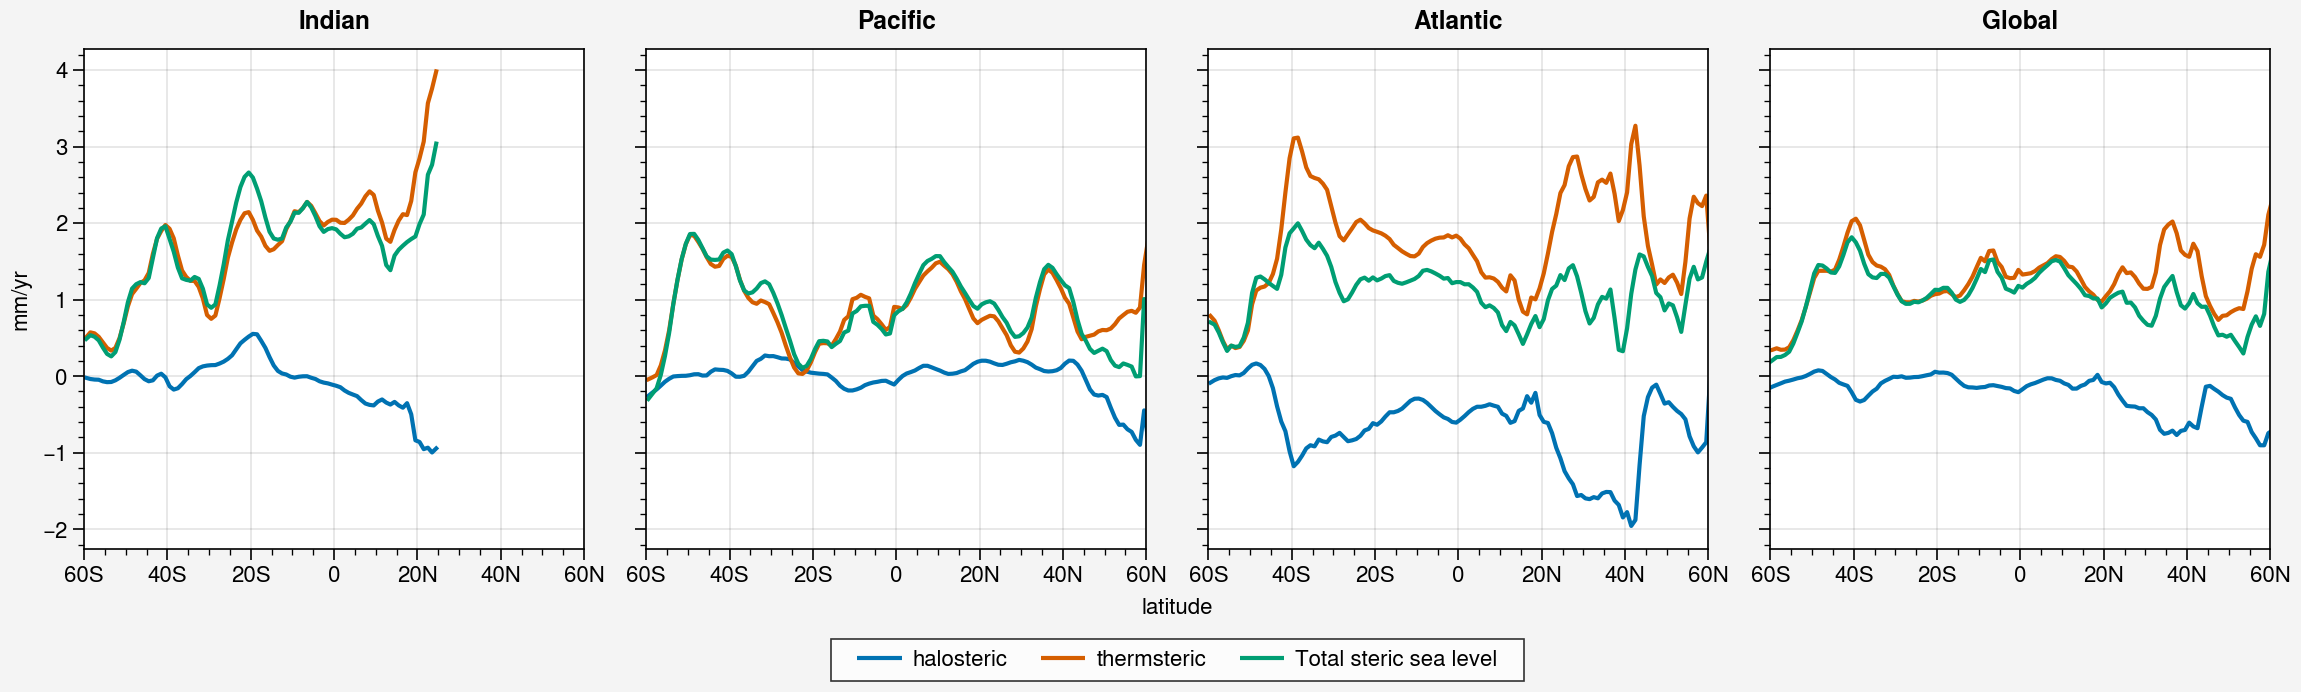

In [9]:
plot.rc.update({'fontsize':8})
fig, axs = plot.subplots(ncols=4,tight=True)
axs.format(collabels=['Indian','Pacific','Atlantic','Global'])


ax = axs[0]
ax.format(xlabel='latitude',xformatter='lat',ylabel='mm/yr',xlim=(-60,60))
ax.plot(Indian_zonal_trend[0][29:151],label='HSLA')
ax.plot(Indian_zonal_trend[1][29:151],label='TSLA')
ax.plot(Indian_zonal_trend[2][29:151],label='SSLA')


ax = axs[1]
ax.format(xlabel='latitude',xformatter='lat',ylabel='mm/yr',xlim=(-60,60))
ax.plot(Pacific_zonal_trend[0][29:151],label='HSLA')
ax.plot(Pacific_zonal_trend[1][29:151],label='TSLA')
ax.plot(Pacific_zonal_trend[2][29:151],label='SSLA')


ax = axs[2]
ax.format(xlabel='latitude',xformatter='lat',ylabel='mm/yr',xlim=(-60,60))
ax.plot(Atlantic_zonal_trend[0][29:151],label='HSLA')
ax.plot(Atlantic_zonal_trend[1][29:151],label='TSLA')
ax.plot(Atlantic_zonal_trend[2][29:151],label='SSLA')


ax = axs[3]
ax.format(xlabel='latitude',xformatter='lat',ylabel='mm/yr',xlim=(-60,60))
h = ax.plot(Global_zonal_trend[0][29:151],label='halosteric')
t = ax.plot(Global_zonal_trend[1][29:151],label='thermsteric')
s = ax.plot(Global_zonal_trend[2][29:151],label='Total steric sea level')
all_legend = [h,t,s]

fig.legend(all_legend,center=True,loc='b')
fig.savefig('D:/steric_sea_level/fig/Basin_zonal_mean_trend_steric_sea_level.pdf',dpi=600,format='pdf')